In [1125]:
import math
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_context("paper", font_scale=1.2)
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [1126]:
df = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores.csv")
df_real = pd.read_csv("../test_images/replica_of_dynamic_unknowndeg_0to360_5degstep/RotationAroundAxis.csv",
                      header=None,
                      names=['correct_roll', 'correct_pitch', 'correct_yaw'])
df = df.merge(df_real, left_index=True, right_index=True)
# normalize correct_roll that is between -180 and 180 to 0 to 360
df['correct_roll'] = df['correct_roll'].apply(lambda x: x % 360)
# df['correct_roll'] = df['correct_roll'].apply(lambda x: x % 360)
df['correct_yaw'] = df['correct_yaw'].apply(lambda x: x % 360)

In [1127]:
# remove rows where loss is above 10
df = df[df['loss'] < 10]

In [1128]:
# rename columns yaw to roll, pitch to yaw, roll to pitch
df = df.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})

In [1129]:
df

,img_number,iterations,loss,pitch,yaw,roll,x,y,z,correct_roll,correct_pitch,correct_yaw
12,12,712,2.350499e-09,-67.109755,-38.297289,74.651927,0.002874,-0.558360,-4.732648,86.076364,-65.182215,298.998143
15,15,1280,2.442141e-07,-70.337988,-36.390192,64.282417,-0.222572,-0.701229,-5.173986,77.284122,-62.404869,292.665526
16,16,669,5.457841e-09,-69.465674,-36.239982,58.610505,-0.297866,-0.717139,-5.212492,74.384862,-61.578038,290.485700
23,23,3841,5.367830e+00,-70.792397,-37.509472,24.890610,-0.820577,-0.673384,-5.387456,54.274766,-57.359479,274.585839
31,31,1157,1.432884e+00,-64.735333,-39.569302,-22.964765,-1.259956,-0.328620,-4.883883,31.386311,-56.280667,255.750674
34,34,550,8.582931e-09,-63.130515,-31.921093,-46.491958,-1.142309,-0.165354,-6.124400,22.803069,-56.953083,248.695527
35,35,3904,8.094140e+00,-55.130515,-39.148938,-53.207296,-1.126987,-0.085240,-6.082900,19.941094,-57.305595,246.359749
39,39,988,5.967575e-03,-45.068662,-34.913086,-85.207294,-0.915822,0.029522,-7.543335,8.477111,-59.333603,237.148935
40,40,644,6.276861e-09,-44.575742,-34.666817,-91.068965,-0.913123,0.052285,-7.677740,5.602927,-59.988996,234.889982
41,41,608,5.539338e-09,-44.745881,-34.309393,-95.564627,-0.909232,0.092563,-7.683238,2.722917,-60.700842,232.653241


In [1130]:
df['og_roll'] = df['roll']
df['roll'] = df['roll'].apply(lambda x: x % 360)
df['yaw'] = df['yaw'].apply(lambda x: x % 360)
# start real roll from roll index 0 and decreasing -5 each time wrapping around % 360
df['og_real_roll'] = df['roll'].iloc[0] - 5 * df['img_number'] + (df['img_number'].iloc[0] * 5)
df['real_roll'] = df['og_real_roll'].apply(lambda x: x % 360)

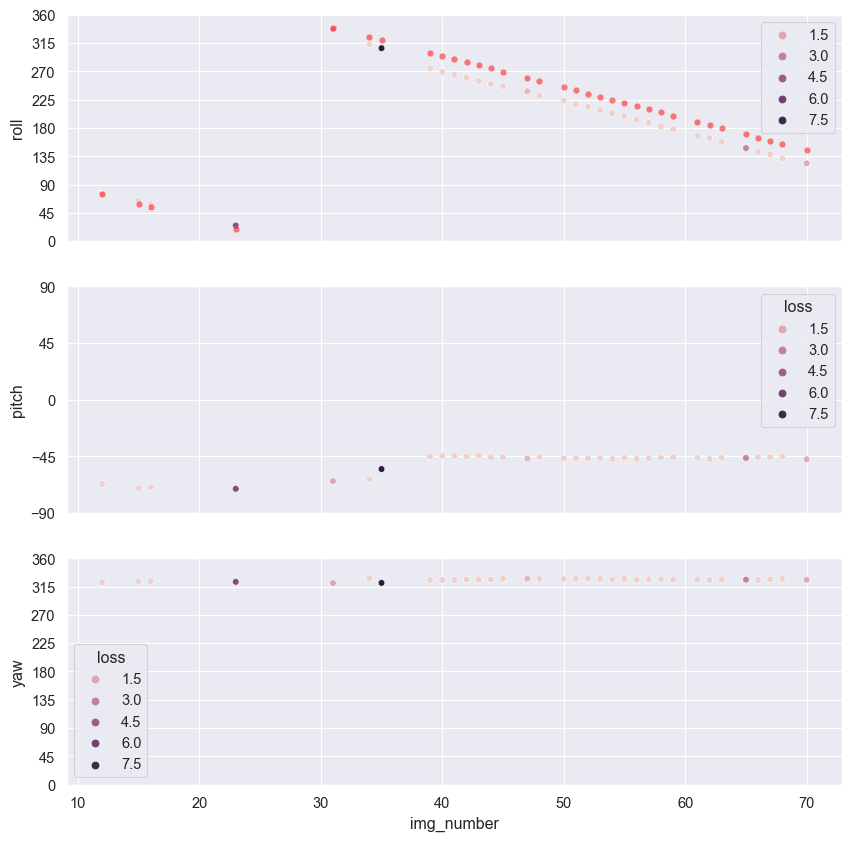

In [1132]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df, x='img_number', y='roll', hue='loss');
# sns.scatterplot(ax=axes[0], data=df, x='img_number', y='correct_roll', color='red', alpha=0.5);
sns.scatterplot(ax=axes[0], data=df, x='img_number', y='real_roll', color='red', alpha=0.5);
axes[0].set_yticks(range(0, 361, 45));
# sns.lineplot(ax=axes[0], data=df, x='img_number', y='real_roll', color='red', alpha=0.5);
# axes[0].vlines(x=44, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
# axes[0].vlines(x=62, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
sns.scatterplot(ax=axes[1], data=df, x='img_number', y='pitch', hue='loss');
# sns.scatterplot(ax=axes[1], data=df, x='img_number', y='correct_pitch', color='red', alpha=0.5);
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df, x='img_number', y='yaw', hue='loss');
# sns.scatterplot(ax=axes[2], data=df, x='img_number', y='correct_yaw', color='red', alpha=0.5);
axes[2].set_yticks(range(0, 361, 45));

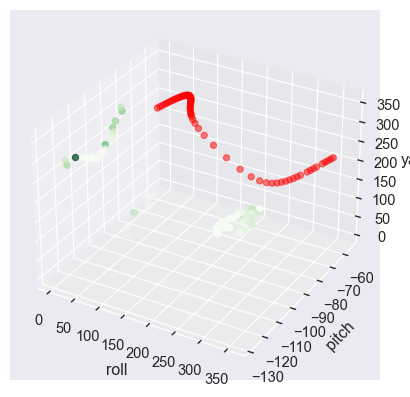

In [1112]:
# plot roll, pitch, yaw in 3d
ax = plt.axes(projection='3d')
ax.scatter3D(df['roll'], df['pitch'], df['yaw'], c=df['loss'], cmap='Greens');
ax.scatter3D(df['correct_roll'], df['correct_pitch'], df['correct_yaw'], color='red', alpha=0.5);
ax.set_xlabel('roll')
ax.set_ylabel('pitch')
ax.set_zlabel('yaw')
plt.show()

<Axes: xlabel='real_roll', ylabel='roll'>

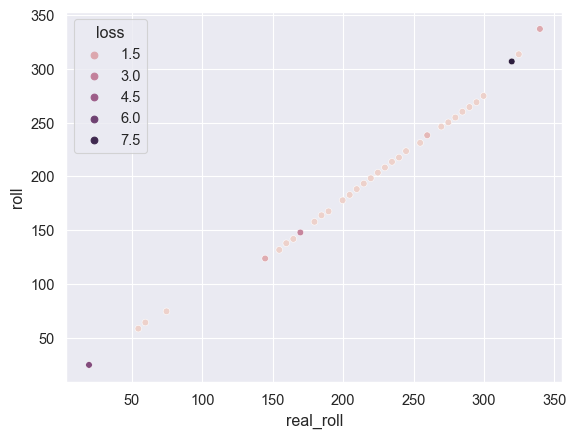

In [1133]:
sns.scatterplot(data=df, x='real_roll', y='roll', hue='loss')

<Axes: xlabel='img_number', ylabel='roll_diff'>

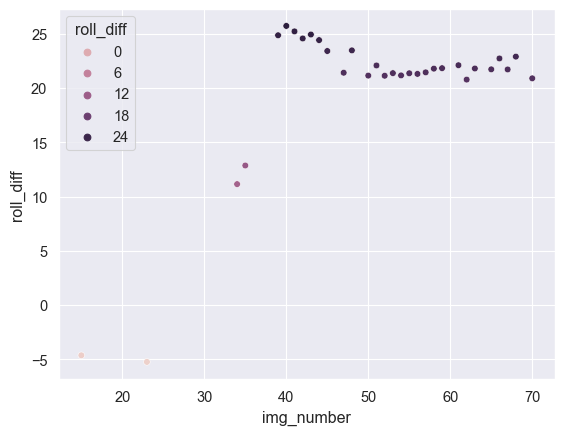

In [1134]:
df['roll_diff'] = df['og_real_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

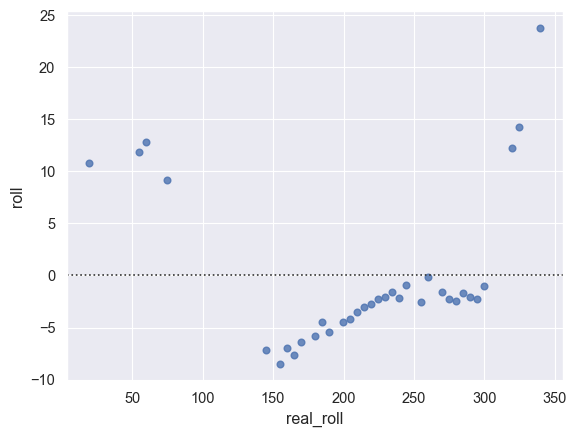

In [1135]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='real_roll', y='roll');

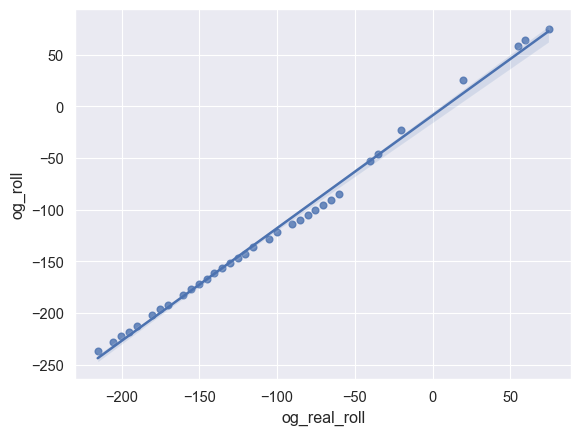

In [1136]:
ax = sns.regplot(data=df, x='og_real_roll', y='og_roll');

In [1137]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

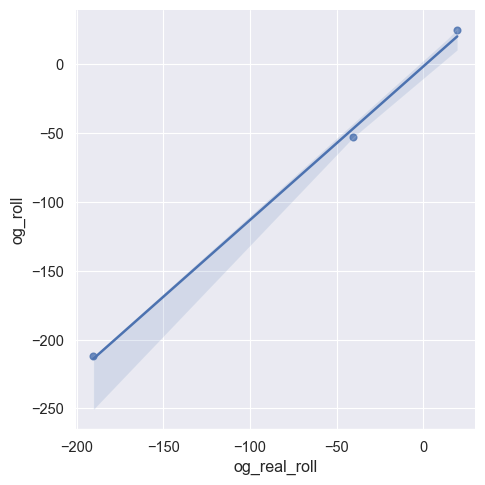

In [1138]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

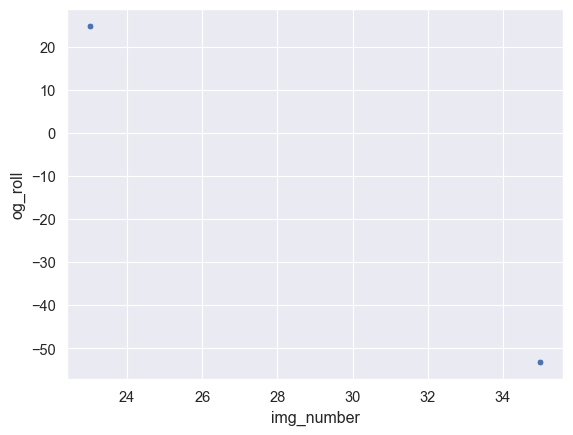

In [1139]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

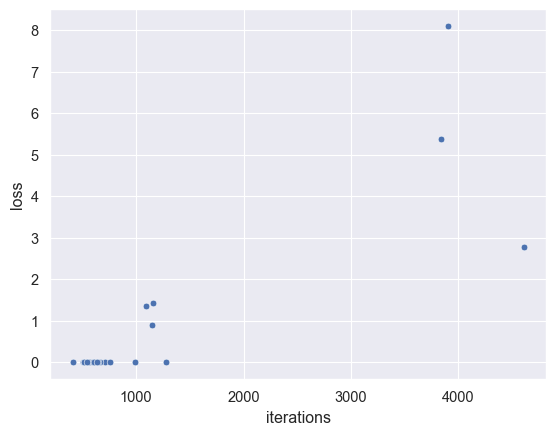

In [1140]:
sns.scatterplot(data=df, y='loss', x='iterations');


In [1141]:
# mse of real roll and roll
np.mean((df['og_real_roll'] - df['og_roll']) ** 2)


413.96863004506787

In [1142]:
df.describe()

,img_number,iterations,loss,pitch,yaw,roll,x,y,z,correct_roll,correct_pitch,correct_yaw,og_roll,og_real_roll,real_roll,roll_diff,rounded_loss
count,34.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,47.705882,971.970588,5.864244e-01,-50.068039,325.746387,195.535046,-0.616945,0.167740,-7.090950,217.747548,-70.854457,239.409892,-122.112013,-103.877485,213.769574,18.234528,0.558824
std,15.491013,1020.491399,1.697398e+00,8.501440,1.932575,74.265946,0.320361,0.364973,0.937741,131.191782,10.296356,34.439658,84.644278,77.455064,79.013526,9.161846,1.654950
min,12.000000,411.000000,2.350499e-09,-70.792397,320.430698,24.890610,-1.259956,-0.717139,-7.791628,2.722917,-86.680189,204.609877,-236.239499,-215.348073,19.651927,-5.238683,0.000000
25%,40.250000,547.750000,5.937226e-09,-47.097499,325.341557,150.412898,-0.872177,0.062354,-7.681863,79.482182,-80.362932,211.089639,-180.914566,-159.098073,172.151927,20.951176,0.000000
50%,50.500000,596.000000,8.662241e-09,-46.335497,326.250787,200.892744,-0.649861,0.312159,-7.462814,282.734946,-69.919756,227.181103,-139.457775,-117.848073,222.151927,21.574919,0.000000
75%,58.750000,743.500000,1.365382e-07,-45.745510,327.096242,249.239794,-0.333163,0.419460,-7.239469,328.799694,-61.755302,257.988714,-92.192881,-66.598073,273.401927,22.849274,0.000000
max,70.000000,4607.000000,8.094140e+00,-44.436899,328.078907,337.035235,0.002874,0.479257,-4.732648,359.835226,-56.280667,314.021322,74.651927,74.651927,339.651927,25.720892,8.000000


In [965]:
# df['approx_pitch'] should be the pitch rounded to nearest 5
df['approx_pitch'] = df['pitch'].apply(lambda x: round(x / 10) * 10)

In [966]:
df_dist = pd.read_csv("distances.csv")

In [967]:
df_dist

,0,1,2,3,4,5
0,50.786869,71.270965,32.971911,49.811014,NaN,NaN
1,50.785844,71.269773,32.971595,49.810353,NaN,NaN
2,50.634137,70.326396,32.176150,48.751588,NaN,NaN
3,35.751411,52.606332,29.076365,39.348784,NaN,NaN
4,50.779234,71.252094,32.961957,49.790000,NaN,NaN
...,...,...,...,...,...,...
110856,1.732940,2.822925,8.270447,3.002610,NaN,NaN
110857,1.732925,2.822992,8.270438,3.002543,NaN,NaN
110858,1.732936,2.822737,8.270830,3.002845,NaN,NaN
110859,1.732923,2.822732,8.270935,3.002862,NaN,NaN


In [968]:
df_dist.describe()

,0,1,2,3,4,5
count,1.108610e+05,1.108610e+05,1.020230e+05,67139.000000,13272.000000,2561.000000
mean,4.712672e+00,1.103455e+01,1.354536e+01,20.822327,40.322908,112.164143
std,7.747001e+00,2.167223e+01,2.105612e+01,31.595389,46.860263,2.527273
min,3.523500e-07,1.397284e-07,4.836494e-07,0.000003,0.259204,93.498961
25%,3.106908e-01,4.566316e-01,9.344222e-01,1.785132,3.421324,110.598386
50%,1.326627e+00,1.753338e+00,4.595321e+00,5.535589,9.276110,113.021331
75%,4.141117e+00,6.818180e+00,1.292099e+01,15.169391,66.413822,113.862792
max,6.932748e+01,1.095001e+02,1.102007e+02,106.766752,142.531701,122.138941


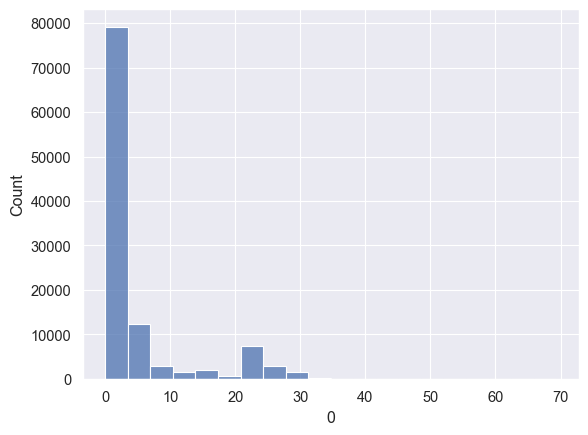

In [969]:
sns.histplot(data=df_dist, x='0', bins=20);

In [970]:
(df.diff()).describe()

,img_number,iterations,loss,pitch,yaw,roll,x,y,z,correct_roll,correct_pitch,correct_yaw,og_roll,og_real_roll,real_roll,roll_diff,rounded_loss,approx_pitch
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.060606,-16.257576,-0.007301,-1.976523,-0.015459,-3.318596,-0.000315,0.000214,-0.003221,0.151415,-0.039825,-0.005304,-3.318596,-5.303030,0.151515,-1.984434,-0.015152,-1.969697
std,0.240435,1745.394681,0.549054,21.361837,14.096231,19.841874,0.106626,0.067686,1.994962,42.688099,1.012527,5.378798,19.841874,1.202174,44.367085,19.645219,0.733641,21.355576
min,1.000000,-5646.000000,-1.572050,-97.820133,-63.046881,-78.177343,-0.492192,-0.249660,-6.129704,-26.351399,-2.530155,-4.718123,-78.177343,-10.000000,-10.000000,-93.679449,-2.000000,-100.000000
25%,1.000000,-66.750000,-0.154696,-3.883159,-1.578191,-6.388032,-0.004457,-0.003171,-0.051211,-4.508740,-0.976420,-2.310901,-6.388032,-5.000000,-5.000000,-3.866166,0.000000,0.000000
50%,1.000000,4.000000,-0.019953,-0.000649,0.181161,-4.929103,0.000048,-0.000004,-0.017244,-3.027867,-0.061109,-2.029773,-4.929103,-5.000000,-5.000000,-0.070897,0.000000,0.000000
75%,1.000000,40.250000,0.201085,1.169179,2.494143,-1.133834,0.005451,0.005361,0.032138,-2.867768,0.864957,-0.953889,-1.133834,-5.000000,-5.000000,1.388032,0.000000,0.000000
max,2.000000,6909.000000,1.268141,70.874514,53.956525,88.679449,0.423044,0.270842,8.154977,339.497226,1.899681,21.565648,88.679449,-5.000000,355.000000,73.177343,2.000000,70.000000


In [971]:
df

,img_number,iterations,loss,pitch,yaw,roll,x,y,z,correct_roll,correct_pitch,correct_yaw,og_roll,og_real_roll,real_roll,roll_diff,rounded_loss,approx_pitch
1,1,1908,1.504556,0.015539,269.701465,354.483857,0.020530,0.001173,-0.007248,123.295573,-78.244572,-44.152291,354.483857,349.483857,349.483857,-5.000000,2.0,0
2,2,1420,0.092592,-0.128203,269.974612,350.096068,0.014718,0.034148,-0.293291,119.068439,-76.935369,-44.763274,350.096068,344.483857,344.483857,-5.612211,0.0,0
3,3,846,0.000598,-0.067011,275.235669,345.311414,0.024520,0.043083,-0.504226,115.161870,-75.638750,-45.707437,345.311414,339.483857,339.483857,-5.827557,0.0,0
4,4,962,0.420860,-0.066454,275.763071,339.939645,0.030164,0.039727,-0.473549,111.491226,-74.359729,-46.901282,339.939645,334.483857,334.483857,-5.455788,0.0,0
5,5,833,0.609566,-0.114210,273.370475,334.997867,0.025443,0.021387,-0.340529,107.998019,-73.102489,-48.287372,334.997867,329.483857,329.483857,-5.514011,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,877,1.209573,-113.030411,257.071849,138.440264,0.017464,-0.005372,-0.148414,171.963620,-85.662480,-63.984022,138.440264,19.483857,19.483857,-118.956407,1.0,-110
68,68,820,0.240416,-107.972806,261.195425,128.440396,-0.003898,-0.006717,-0.028756,157.623186,-84.620406,-54.433702,128.440396,14.483857,14.483857,-113.956539,0.0,-110
69,69,858,0.137912,-117.964472,264.310643,133.310520,-0.007334,0.014915,-0.080254,147.366750,-83.432329,-48.971823,133.310520,9.483857,9.483857,-123.826663,0.0,-120
70,70,827,0.137536,-127.959798,263.408098,138.293403,-0.000202,0.018808,-0.128197,139.573127,-82.170727,-45.978678,138.293403,4.483857,4.483857,-133.809546,0.0,-130
